# Random Walks

## Location, Field, and Drunk

### How Far will a Drunk Get?

- Simulated, by hand, a walk in last lecture
- Process too labor intensive to be practical for more than a few steps
- But we can write a program to simulate lots of steps

### Structure of Simulation
- Simulate one walk of k steps
- Simulate n such walks
- Report average distance from origin

### Class Location

```python
class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist ** 2 + yDist ** 2) ** 0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' +str(self.y) + '>'
```

### Class Field

```python
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        # use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
```

### Notable Aspects of Class Field
- A mapping of drunks to locations
- Unbounded size
- Allows multiple drunks
    - With no constraints about how they relate to each other

### Class Drunk

```python
class Drunk(object):
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return 'This drunk is named ' + self.name
```

### Two Subclasses of Drunk
- The "usual" drunk, who wanders around at random
- The "I hate winter" drunk, who tries to move southward

```python
import random

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 0.9), (0.0, -1.1), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
```

## Simulating a Walk

### Simulating a Single Walk
```python
def walk(f, d, numSteps):
    """
    Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
    Moves d numSteps times; returns the distance between the final location and
    the location at the start of the walk
    """
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))
```

### Simulating Multiple Walks
```python
def simWalks(numSteps, numTrials, dClass):
    """
    Assumes numSteps an int >= 0, numtrials an int > 0,
    dClass a subclass of Drunk
    Simulates numTrials walks of numSteps steps each.
    Returns a list of the final distances for each trial
    """
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances
```

```python
def drunkTest(walkLengths, numTrials, dClass):
    """
    Assumes walkLengths a sequence of ints >= 0, numTrials an int > 0,
    dClass a subclass of Drunk
    For each number of steps in walkLengths, runs simWalks with numTrials walks and
    prints results
    """
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numtrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean = ', round(sum(distances) / len(distances), 4))
        print(' Max = ', max(distances), ' Min = ', min(distances))
```

In [1]:
from lect6_segment2 import *

In [4]:
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5 Min = 10.0


In [5]:
drunkTest((0, 1, 2), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 2 steps
 Mean = 1.28
 Max = 2.0 Min = 0.0


### And the Heat-seeking Drunk
```python
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 0.9), (0.0, -1.1), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
```

In [6]:
simAll((UsualDrunk, ColdDrunk), (1, 10, 100, 1000, 10000), 100)

UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0
UsualDrunk random walk of 10 steps
 Mean = 2.614
 Max = 6.3 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.711
 Max = 21.2 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 28.836
 Max = 69.1 Min = 4.5
UsualDrunk random walk of 10000 steps
 Mean = 90.304
 Max = 192.9 Min = 13.3
ColdDrunk random walk of 1 steps
 Mean = 0.992
 Max = 1.1 Min = 0.9
ColdDrunk random walk of 10 steps
 Mean = 2.61
 Max = 7.0 Min = 0.4
ColdDrunk random walk of 100 steps
 Mean = 10.316
 Max = 27.2 Min = 1.0
ColdDrunk random walk of 1000 steps
 Mean = 51.106
 Max = 96.3 Min = 7.4
ColdDrunk random walk of 10000 steps
 Mean = 510.54
 Max = 650.8 Min = 367.6


## Random Walks

In [10]:
from lect6_segment3 import *
import random, pylab

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps


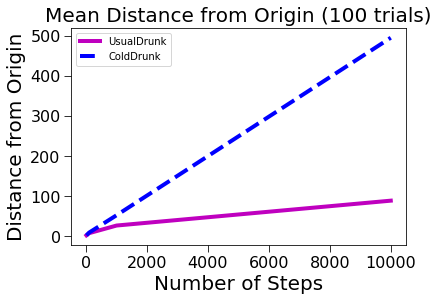

In [11]:
random.seed(0)
numSteps = (10, 100, 1000, 10000)
simAll((UsualDrunk, ColdDrunk), numSteps, 100)

### Plotting Ending Locations

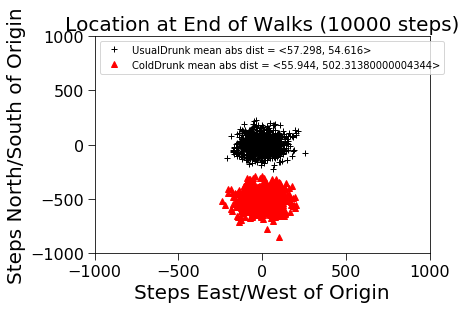

In [12]:
plotLocs((UsualDrunk, ColdDrunk), 10000, 1000)

### Adding Wormholes

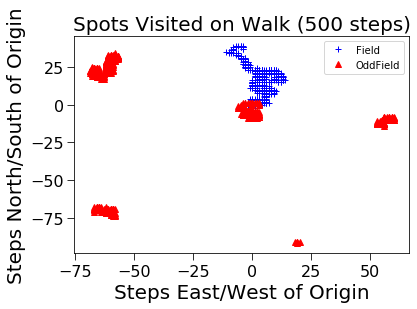

In [16]:
random.seed(0)
traceWalk((Field, OddField), 500)